<a href="https://colab.research.google.com/github/abdulrah77/R_CaseStudy/blob/main/Cyclist_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Files can be imported from google drive, not present in local
# import os
# from google.colab import files

In [ ]:
# import openpyxl
import numpy as np 
import pandas as pd
# from pandas_profiling import ProfileReport as pr
import os
import glob # glob to collect multiple file paths

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  --quiet  

     |████████████████████████████████| 25.9 MB 2.1 MB/s 
     |████████████████████████████████| 10.9 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 49.2 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 687 kB 53.7 MB/s 
     |████████████████████████████████| 4.7 MB 40.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 54.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Glob library used to read the multipe files from a path and creates list of filenames

In [ ]:
path= "/content/"
files = glob.glob(path + '*.csv')

File names list are then used to create list of data frames

In [ ]:
li= []
for f in files:
  temp_df = pd.read_csv(f)
  li.append(temp_df)
  

List of data frames are then combined along the column using pandas concat


In [ ]:
df = pd.concat(li, axis=0)



In [ ]:
df.columns.values.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'ride_length',
 'day_of_week',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [ ]:
# df_test= pd.read_csv("/content/202101-divvy-tripdata.csv") # Used to cross check if correct files were fetched from the right path

In [ ]:
# df_test.drop(['ride_length', 'day_of_week'], axis=1, inplace=True)

In [ ]:
df.describe()


,day_of_week,start_lat,start_lng,end_lat,end_lng
count,146456.000000,146456.000000,146456.000000,146139.000000,146139.000000
mean,4.282501,41.900030,-87.645500,41.900167,-87.645740
std,1.999528,0.046302,0.026778,0.046371,0.026849
min,1.000000,41.640000,-87.780000,41.540000,-87.810000
25%,3.000000,41.881032,-87.659753,41.881032,-87.660000
50%,4.000000,41.896373,-87.642715,41.896373,-87.642985
75%,6.000000,41.926651,-87.629452,41.928712,-87.629521
max,7.000000,42.064854,-87.528232,42.070000,-87.510000


In [ ]:
df.groupby('member_casual').mean()

,day_of_week,start_lat,start_lng,end_lat,end_lng
member_casual,,,,,
casual,4.478476,41.898697,-87.645166,41.899027,-87.645657
member,4.235669,41.900349,-87.645580,41.900439,-87.645760


In [ ]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'ride_length',
       'day_of_week', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual'],
      dtype='object')

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,1/23/2021 16:14,1/23/2021 16:24,0:10:25,7,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,1/27/2021 18:43,1/27/2021 18:47,0:04:04,4,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,1/21/2021 22:35,1/21/2021 22:37,0:01:20,5,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,1/7/2021 13:31,1/7/2021 13:42,0:11:42,5,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,1/23/2021 2:24,1/23/2021 2:24,0:00:43,7,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [ ]:
df['started_at']=pd.to_datetime(df['started_at'], format="%m/%d/%Y %H:%M")
df['ended_at']=pd.to_datetime(df['ended_at'], format="%m/%d/%Y %H:%M")

In [ ]:
df['ended_at'].head()

0   2021-01-23 16:24:00
1   2021-01-27 18:47:00
2   2021-01-21 22:37:00
3   2021-01-07 13:42:00
4   2021-01-23 02:24:00
Name: ended_at, dtype: datetime64[ns]

In [ ]:
df['month'] = df['started_at'].dt.strftime('%B')
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,0:10:25,7,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,January
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,0:04:04,4,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,January
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,0:01:20,5,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,January
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,0:11:42,5,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,January
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,0:00:43,7,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,January


In [ ]:
df['day'] = df['started_at'].dt.strftime('%d')
df['year'] = df['started_at'].dt.strftime('%Y')
df['day_of_week'] = df['started_at'].dt.strftime('%A')

df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,day,year
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,0:10:25,Saturday,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,January,23,2021
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,0:04:04,Wednesday,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,January,27,2021
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,0:01:20,Thursday,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,January,21,2021
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,0:11:42,Thursday,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,January,07,2021
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,0:00:43,Saturday,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,January,23,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146456 entries, 0 to 49621
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             146456 non-null  object        
 1   rideable_type       146456 non-null  object        
 2   started_at          146456 non-null  datetime64[ns]
 3   ended_at            146456 non-null  datetime64[ns]
 4   ride_length         146456 non-null  object        
 5   day_of_week         146456 non-null  object        
 6   start_station_name  133785 non-null  object        
 7   start_station_id    133785 non-null  object        
 8   end_station_name    130821 non-null  object        
 9   end_station_id      130821 non-null  object        
 10  start_lat           146456 non-null  float64       
 11  start_lng           146456 non-null  float64       
 12  end_lat             146139 non-null  float64       
 13  end_lng             146139 non

In [ ]:
df['ride_length']=(df.ended_at-df.started_at).astype('timedelta64[m]')

In [ ]:
#df.drop(['ride_length'],axis=1, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146456 entries, 0 to 49621
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             146456 non-null  object        
 1   rideable_type       146456 non-null  object        
 2   started_at          146456 non-null  datetime64[ns]
 3   ended_at            146456 non-null  datetime64[ns]
 4   ride_length         146456 non-null  float64       
 5   day_of_week         146456 non-null  object        
 6   start_station_name  133785 non-null  object        
 7   start_station_id    133785 non-null  object        
 8   end_station_name    130821 non-null  object        
 9   end_station_id      130821 non-null  object        
 10  start_lat           146456 non-null  float64       
 11  start_lng           146456 non-null  float64       
 12  end_lat             146139 non-null  float64       
 13  end_lng             146139 non

In [ ]:
df_modified = df.loc[~((df.start_station_name== "HR QR") | (df.ride_length <0))]

In [ ]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146454 entries, 0 to 49621
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             146454 non-null  object        
 1   rideable_type       146454 non-null  object        
 2   started_at          146454 non-null  datetime64[ns]
 3   ended_at            146454 non-null  datetime64[ns]
 4   ride_length         146454 non-null  float64       
 5   day_of_week         146454 non-null  object        
 6   start_station_name  133783 non-null  object        
 7   start_station_id    133783 non-null  object        
 8   end_station_name    130821 non-null  object        
 9   end_station_id      130821 non-null  object        
 10  start_lat           146454 non-null  float64       
 11  start_lng           146454 non-null  float64       
 12  end_lat             146138 non-null  float64       
 13  end_lng             146138 non

In [ ]:
df_modified.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,146454.000000,146454.000000,146454.000000,146138.000000,146138.000000
mean,18.370458,41.900030,-87.645500,41.900167,-87.645740
std,149.056770,0.046302,0.026778,0.046371,0.026849
min,0.000000,41.640000,-87.780000,41.540000,-87.810000
25%,6.000000,41.881032,-87.659753,41.881032,-87.660000
50%,10.000000,41.896373,-87.642715,41.896373,-87.642985
75%,17.000000,41.926650,-87.629453,41.928712,-87.629521
max,30130.000000,42.064854,-87.528232,42.070000,-87.510000


In [ ]:
#pr(df_modified)

In [ ]:
df_modified['ride_length'].mean()

18.370457618091688

In [ ]:
df_modified['ride_length'].describe()

count    146454.000000
mean         18.370458
std         149.056770
min           0.000000
25%           6.000000
50%          10.000000
75%          17.000000
max       30130.000000
Name: ride_length, dtype: float64

In [ ]:
df_modified.groupby(['member_casual'])['ride_length'].agg(np.mean).reset_index()

,member_casual,ride_length
0,casual,34.180084
1,member,14.592390


In [ ]:
df_modified.groupby(['member_casual','day_of_week'])['ride_length'].agg(np.mean).reset_index()


,member_casual,day_of_week,ride_length
0,casual,Friday,36.823027
1,casual,Monday,24.100636
2,casual,Saturday,45.466747
3,casual,Sunday,33.972046
4,casual,Thursday,21.461652
5,casual,Tuesday,31.746971
6,casual,Wednesday,28.585950
7,member,Friday,13.981756
8,member,Monday,14.931572
9,member,Saturday,15.542551


In [ ]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_modified['day_of_week']=pd.Categorical(df_modified['day_of_week'], categories=cats, ordered=True)
df_present= df_modified.groupby(['member_casual','day_of_week'])['ride_length'].agg(np.mean).reset_index()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from matplotlib import pyplot as plt

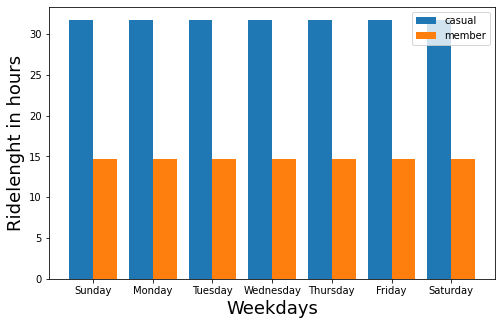

In [ ]:
plt.figure(figsize =(8, 5))

casual = df_present[df_present['member_casual'] == 'casual']
member = df_present[df_present['member_casual'] == 'member']
r= np.arange(7)
plt.bar(r,np.mean(casual['ride_length']), label='casual', width=0.4)
plt.bar(r + 0.4 ,np.mean(member['ride_length']), label='member',width=0.4)
plt.legend()
#plt.bar(r+0.2, member['day_of_week'], label='member')
plt.xticks(r+0.2, cats)
plt.xlabel("Weekdays", fontsize=18, fontstyle='normal')
plt.ylabel("Ridelenght in hours", fontsize=18, fontstyle='normal')
plt.show()

In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
df_present.head

<bound method NDFrame.head of    member_casual day_of_week  ride_length
0         casual      Sunday    33.972046
1         casual      Monday    24.100636
2         casual     Tuesday    31.746971
3         casual   Wednesday    28.585950
4         casual    Thursday    21.461652
5         casual      Friday    36.823027
6         casual    Saturday    45.466747
7         member      Sunday    15.820648
8         member      Monday    14.931572
9         member     Tuesday    13.919249
10        member   Wednesday    14.930527
11        member    Thursday    13.361742
12        member      Friday    13.981756
13        member    Saturday    15.542551>

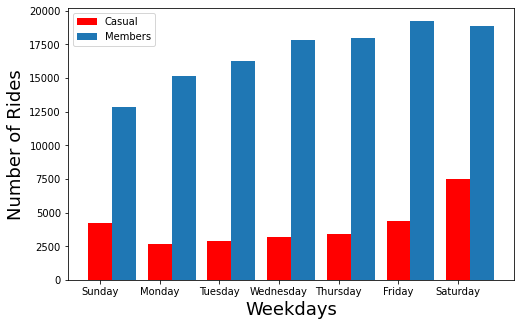

In [ ]:
df_count =df_modified.groupby(['member_casual','day_of_week'])['ride_length'].count().reset_index()
casual_count=df_count[df_count['member_casual']=='casual']
member_count=df_count[df_count['member_casual']=='member']
plt.figure(figsize=(8,5))
plt.bar(r,casual_count['ride_length'], label = 'Casual', width=.4, color='red')
plt.bar(r+0.4,member_count['ride_length'], label = 'Members', width=.4)
plt.xticks(r,cats, fontstyle='normal')
plt.xlabel("Weekdays", fontsize=18, fontstyle= "normal")
plt.ylabel("Number of Rides", fontsize=18, fontstyle= "normal")
plt.legend()
plt.show()

In [ ]:
df_count.head()

,member_casual,day_of_week,ride_length
0,casual,Sunday,4257
1,casual,Monday,2673
2,casual,Tuesday,2889
3,casual,Wednesday,3217
4,casual,Thursday,3390


In [ ]:
!pip install geopy

In [ ]:
from geopy.distance import geodesic
from geopy.distance import great_circle
df_modified= df_modified.dropna()
start_loc= (41.90034067, -87.696743)
end_loc = (41.89, -87.72)
great_circle(start_loc,end_loc).kilometers
#usertypemean = df_modified.group(['member_casual']).agg(mean_time = np.mean(ride_length))

2.24224709217598